#Business Analytics: Data Visualization Assignment


##Overview

In this assignment, I will apply the Matplotlib visualization techniques we covered in class to analyze business data for a fictional e-commerce company called “TechTrends.” TechTrends is interested in understanding their sales performance, customer behavior, and market position, and they need your help to create insightful visualizations that will guide their business decisions.


###Demonstrated Skills:

This assignment demonstrates my abilities to:
1. Create appropriate visualizations for different types of business data
2. Customize plots with proper titles, labels, and styling
3. Create multi-plot dashboards for comprehensive data analysis
4. Integrate pandas with matplotlib for efficient data visualization
5. Apply best practices for effective business visualizations
6. Draw insights from visualizations and communicate them effectively


In [1]:
#YOU MUST RUN THIS CELL BEFORE OTHERS

import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

customer_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/customer-data.csv")
prod_performance_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/product-performance.csv")
comp_analysis_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/competitor-analysis.csv")

##Task 1: Sales Trends Analysis

In [2]:
sales_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sales-data.csv")
sales_df['Month-Year'] = sales_df['Month'] + '-' + sales_df['Year'].astype(str)
sales_df['Date'] = pd.to_datetime(sales_df['Month-Year'], format='%b-%Y')
sales_df.set_index('Date', inplace=True)

###Part 1

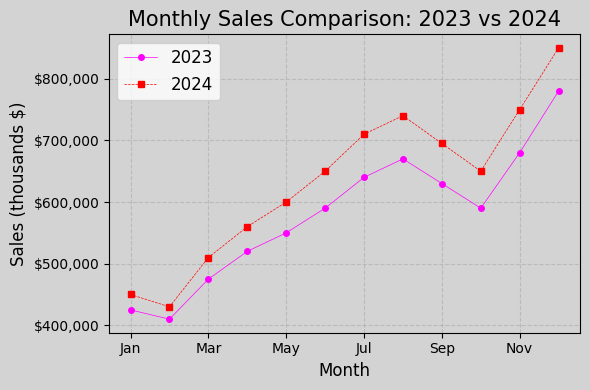

In [3]:
# Plot directly from the DataFrame
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_facecolor('lightgray')
fig.set_facecolor('lightgray')

#defining order of months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#plot lines from selected data in df
sales_df[sales_df['Year'] == 2023].groupby('Month', observed=False)['Sales'].sum().reindex(month_order).plot(x='Month', y='Sales', kind='line', color='magenta', linestyle='-', marker='o',
        linewidth=0.5, markersize=4, label='2023')
sales_df[sales_df['Year'] == 2024].groupby('Month', observed=False)['Sales'].sum().reindex(month_order).plot(x='Month', y='Sales', kind='line', color='red', linestyle='--', marker='s',
        linewidth=0.5, markersize=4, label='2024')

#formatting with labels, title, ticks, grids and legends
ax.set_xlabel('Month', fontsize=12)
ax.set_title('Monthly Sales Comparison: 2023 vs 2024', fontsize=15)

ax.set_yticklabels(['${:,.0f}'.format(x) for x in ax.get_yticks()])
ax.set_ylabel('Sales (thousands $)', fontsize=12)

ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

###Part 2

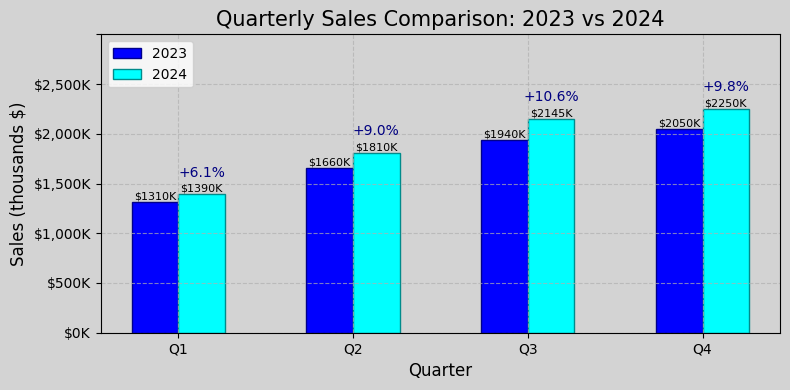

In [ ]:
#preparing the data
quarterly_sales_2023 = (sales_df[sales_df['Year'] == 2023].groupby(pd.Grouper('Month-Year', freq='QE'))['Sales'].sum())/1000
quarterly_sales_2024 = (sales_df[sales_df['Year'] == 2024].groupby(pd.Grouper('Month-Year', freq='QE'))['Sales'].sum())/1000

# Align by quarter
# Create quarter labels (Q1, Q2, Q3, Q4) from the index
quarter_labels = ['Q1', 'Q2', 'Q3', 'Q4']
quarterly_sales_2023.index = quarter_labels
quarterly_sales_2024.index = quarter_labels

# Calculate percentage change
pct_change = ((quarterly_sales_2024 - quarterly_sales_2023) / quarterly_sales_2023.replace(0, np.nan)) * 100
pct_change = pct_change.fillna(0).values  # Convert to NumPy array

#creating the plot
fig, ax = plt.subplots(figsize=(8, 4))
x = np.arange(0, 6, 1.5)  # [0, 1.5, 3, 4.5]
width = 0.4
fig.set_facecolor('lightgray')
ax.set_facecolor('lightgray')

#plotting the bars
bars_2023 = ax.bar(x - width/2, quarterly_sales_2023.values, width, color='blue', edgecolor='darkblue', label='2023')
bars_2024 = ax.bar(x + width/2, quarterly_sales_2024.values, width, color='cyan', edgecolor= 'darkcyan', label='2024')

# Adding sales value labels for 2023
for bar in bars_2023:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 5, f'${height:.0f}K', ha='center', va='bottom', fontsize=8)

# Adding sales value and percentage change labels for 2024
for i, bar in enumerate(bars_2024):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 5, f'${height:.0f}K', ha='center', va='bottom', fontsize=8)
    ax.text(bar.get_x() + bar.get_width()/2, height + 150, f'{pct_change[i]:+.1f}%', ha='center', va='bottom', fontsize=10, color='navy')

#adding ticks and tick labels
ax.set_xticks(x)
ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])
ax.set_yticklabels(['${:,.0f}K'.format(x) for x in ax.get_yticks()])

#adding labels and title
ax.set_xlabel('Quarter', fontsize=12)
ax.set_ylabel('Sales (thousands $)', fontsize=12)
ax.set_title('Quarterly Sales Comparison: 2023 vs 2024', fontsize=15)
ax.set_ylim(0, 3000)
#adding legends and grids
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

###Part 3

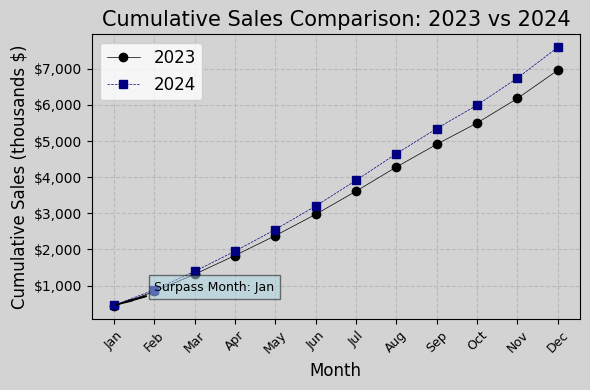

In [7]:
#defining month order and making 'Month' column categorical
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sales_df['Month'] = pd.Categorical(sales_df['Month'], categories=month_order, ordered=True)

#creating pivot table from data for visualization
sales_pivot = sales_df.pivot_table(index='Month', columns='Year', values='Sales', aggfunc='sum')
cumulative_pivot = sales_pivot.cumsum().div(1000)  # Cumulative sum

#creating plot
fig, ax = plt.subplots(figsize=(6, 4))
fig.set_facecolor('lightgray')
ax.set_facecolor('lightgray')

#plotting lines
cumulative_pivot[2023].plot(kind='line', marker='o', linestyle='-', color='black', linewidth=0.5, label='2023', ax=ax)
cumulative_pivot[2024].plot(kind='line', marker='s', linestyle='--', color='navy', linewidth=0.5, label='2024', ax=ax)

# Formatting

#adding labels
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Cumulative Sales (thousands $)', fontsize=12)

#adding title
ax.set_title('Cumulative Sales Comparison: 2023 vs 2024', fontsize=15)

#adding ticks and tick labels
ax.set_yticklabels(['${:,.0f}'.format(x) for x in ax.get_yticks()])
ax.set_xticks(range(len(month_order)))
ax.set_xticklabels(month_order, rotation=45, fontsize=9)

#adding grid and legend
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=12)

#adding annotation
surpass_month = None

#if cumulative sales in 2024 surpasses 2023
for month in cumulative_pivot.index:
    if cumulative_pivot[2024].loc[month] > cumulative_pivot[2023].loc[month]:
        surpass_month = month
        break

#if surpass month is found, add annotation
if surpass_month is not None:
    x = month_order.index(surpass_month)  # Get the position of the month in month_order
    y_2024 = cumulative_pivot[2024].loc[surpass_month]
    ax.annotate(
        f'Surpass Month: {surpass_month}',
        xy=(x, y_2024),  # Point to annotate
        xytext=(x + 1, y_2024 + 500),  # Position of the text
        arrowprops=dict(facecolor='red', shrink=0.05, width=0.5, headwidth=1),
        fontsize=9, ha='left', va='center',
        bbox=dict(facecolor='lightblue', alpha=0.5)
    )

plt.tight_layout()
plt.show()

##Task 2: Product Performance Analysis

###Part 1

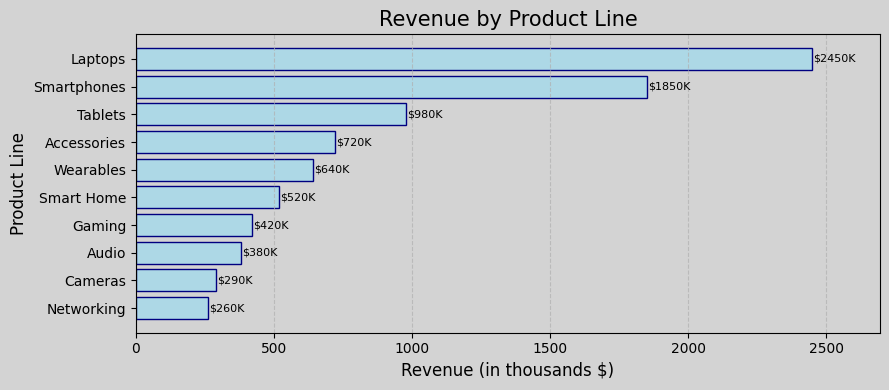

In [8]:
prod_performance_df['Revenue (thousands $)'] = prod_performance_df['Revenue']/1000
prod_performance_df.sort_values(by='Revenue (thousands $)', ascending=False, inplace=True)

#creating a plot
fig, ax = plt.subplots(figsize=(9, 4))
fig.set_facecolor('lightgray')
ax.set_facecolor('lightgray')


#adding horizontal bars
bars = ax.barh(prod_performance_df['Category'], prod_performance_df['Revenue (thousands $)'], color = 'lightblue', edgecolor= 'navy')

#inverting y-axis
ax.invert_yaxis()

# Add data labels inside each bar
ax.bar_label(bars, labels=[f'${v:.0f}K' for v in prod_performance_df['Revenue (thousands $)']], padding=0.8, fontsize=8)
#formatting
ax.grid(True, axis='x', linestyle='--', alpha=0.7)
ax.set_title('Revenue by Product Line', fontsize=15)
ax.set_xlabel('Revenue (in thousands $)', fontsize=12)
ax.set_ylabel('Product Line', fontsize=12)
ax.set_xlim(0, max(prod_performance_df['Revenue (thousands $)']) * 1.1)  # Set x-axis limit


plt.tight_layout()
plt.show()

###Part 2

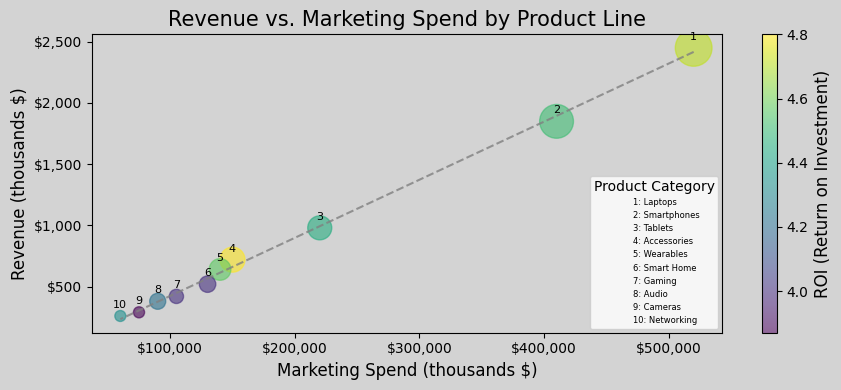

In [27]:
#finding profit margin in dollars for better visual representation
prod_performance_df['Profit_Margin (thousands) $'] = ((prod_performance_df['Profit_Margin']/100)*prod_performance_df['Revenue'])/1000

#creating plot
fig, ax = plt.subplots(figsize=(9, 4))
fig.set_facecolor('lightgray')
ax.set_facecolor('lightgray')

# Create scatter plot with varying sizes based on campaign size
scatter = ax.scatter(prod_performance_df['Marketing_Spend'], prod_performance_df['Revenue (thousands $)'], s=prod_performance_df['Profit_Margin (thousands) $'],
                    alpha=0.6, c=prod_performance_df['ROI'], cmap='viridis', label=prod_performance_df['Category'])

#formatting
ax.set_xlabel('Marketing Spend (thousands $)', fontsize=12)
ax.set_ylabel('Revenue (thousands $)', fontsize=12)
ax.set_xticklabels(['${:,.0f}'.format(x) for x in ax.get_xticks()])
ax.set_yticklabels(['${:,.0f}'.format(x) for x in ax.get_yticks()])

# Add a colorbar to indicate campaign size
cbar = plt.colorbar(scatter)
cbar.set_label('ROI (Return on Investment)', fontsize=12)

#Adding a trend line
z = np.polyfit(prod_performance_df['Marketing_Spend'], prod_performance_df['Revenue (thousands $)'], 1)
p = np.poly1d(z)
ax.plot(prod_performance_df['Marketing_Spend'], p(prod_performance_df['Marketing_Spend']), "r--", alpha=0.8, color='grey')

# Create custom legend entries with numbers and categories, no colors
categories = prod_performance_df['Category'].unique()
handles = []
for i, category in enumerate(categories):
    num = i + 1
    # Use s=0 to make the marker invisible, so only the text shows in the legend
    handles.append(ax.scatter([], [], s=0, label=f'{num}: {category}'))

# Add labels to each scatter point with its number
for i, (x, y) in enumerate(zip(prod_performance_df['Marketing_Spend'], prod_performance_df['Revenue (thousands $)'])):
    ax.text(x, y + 50, str(i + 1), ha='center', va='bottom', fontsize=8, color='black')

# Add legend with custom handles (exclude the trend line)
ax.legend(handles=handles, fontsize=6, loc='lower right', title='Product Category')

#adding title
ax.set_title('Revenue vs. Marketing Spend by Product Line', fontsize=15)

plt.tight_layout()
plt.show()

###Part 3

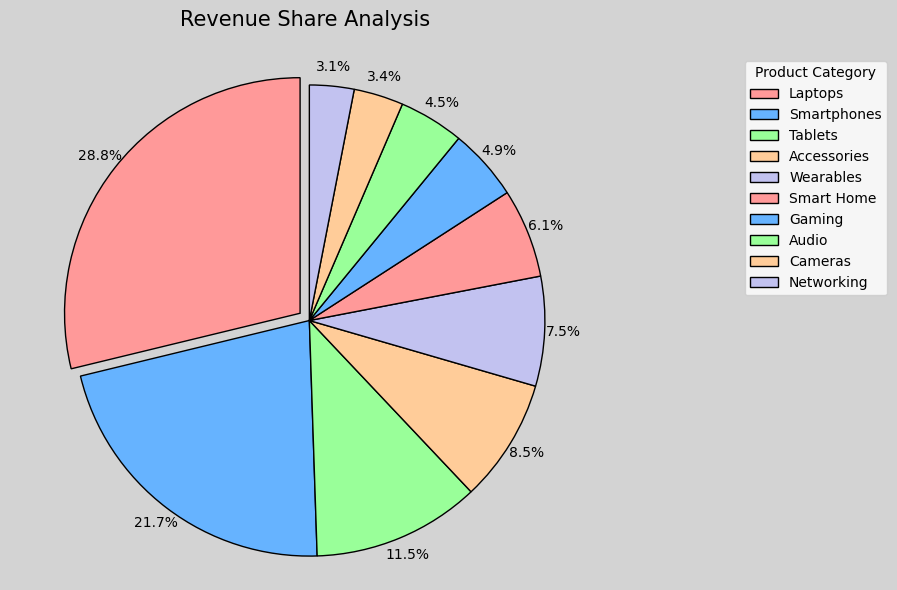

In [15]:
prod_performance_df['Revenue Distribution'] = (prod_performance_df['Revenue']/prod_performance_df['Revenue'].sum())*100

#creating plot
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('lightgray')
ax.set_facecolor('lightgray')

#exploding largest segment
largest_segment_index = prod_performance_df['Revenue Distribution'].idxmax()    # Find the index of the largest segment

# Create an explode list: 0 for all segments except the largest one
explode = [0] * len(prod_performance_df)  # Initialize with zeros
explode[largest_segment_index] = 0.05

#create a pie chart
wedges, texts, autotexts = ax.pie(prod_performance_df['Revenue Distribution'], autopct='%1.1f%%', labels=None,
                                  startangle=90, shadow=False,
                                  colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'],
                                  pctdistance=1.08,  # Move percentage labels outside the pie chart
                                  labeldistance=None,
                                  explode=explode,
                                  wedgeprops={'edgecolor': 'black', 'linewidth': 1})

# Enhance the text appearance
for text in texts:
    text.set_color('black')
    text.set_fontsize(10)

#adding title and legend
ax.set_title('Revenue Share Analysis', fontsize=15, pad=20)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
ax.legend(wedges, prod_performance_df['Category'], title="Product Category", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

##Task 3: Customer Segmentation Analysis

###Part 1

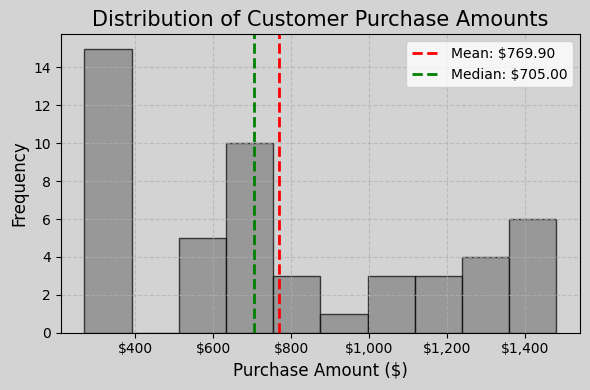

In [16]:
#create plot
fig, ax = plt.subplots(figsize=(6, 4))
fig.set_facecolor('lightgray')
ax.set_facecolor('lightgray')

#finding appropriate binning
q25, q75 = np.percentile(customer_df['Purchase_Amount'], [25, 75])
bin_width = 2 * (q75 - q25) * (len(customer_df['Purchase_Amount']) ** (-1/3))
num_bins = max(10, int((customer_df['Purchase_Amount'].max() - customer_df['Purchase_Amount'].min()) / bin_width))

# Create histogram
n, bins, patches = ax.hist(customer_df['Purchase_Amount'], bins=num_bins, color='grey',
                           edgecolor='black', alpha=0.7)

#creating mean and median variables
mean_purchase_amt = customer_df['Purchase_Amount'].mean()
median_purchase_amt = customer_df['Purchase_Amount'].median()

#Add mean and median lines
ax.axvline(mean_purchase_amt, color='red', linestyle='dashed',
           linewidth=2, label=f'Mean: ${mean_purchase_amt:.2f}')
ax.axvline(median_purchase_amt, color='green', linestyle='dashed',
           linewidth=2, label=f'Median: ${median_purchase_amt:.2f}')

#adding titles
ax.set_title('Distribution of Customer Purchase Amounts', fontsize=15)

#adding axes labels
ax.set_xlabel('Purchase Amount ($)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

#adding xtick labels
ax.set_xticklabels(['${:,.0f}'.format(x) for x in ax.get_xticks()])

#adding legends
ax.legend()

#adding gridlines
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

###Part 2

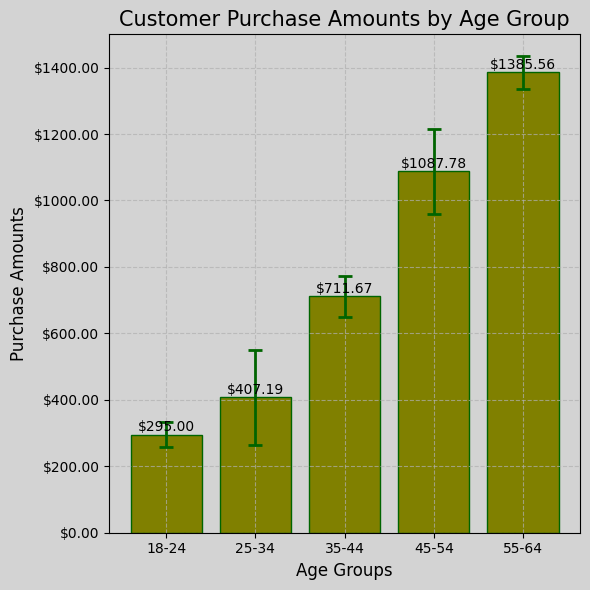

In [17]:
#preparing the data
bins = [18, 25, 35, 45, 55, 65, 100]  # Age brackets
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']  # Corresponding labels
customer_df['Age_Group'] = pd.cut(customer_df['Age'], bins=bins, labels=labels, right=False)

# Compute average purchase amount by age group
avg_purchase = customer_df.groupby('Age_Group')['Purchase_Amount'].mean()

#creating plot
fig, ax = plt.subplots(figsize=(6, 6))
fig.set_facecolor('lightgray')
ax.set_facecolor('lightgray')

# Create a bar chart
bars = ax.bar(avg_purchase.index, avg_purchase.values, color='olive', edgecolor='darkgreen')

# Compute standard deviation of purchase amount by age group
std_purchase = customer_df.groupby('Age_Group')['Purchase_Amount'].std()

# Add error bars to the bar chart
ax.errorbar(avg_purchase.index, avg_purchase.values, yerr=std_purchase.values,
            fmt='none', ecolor='darkgreen', capsize=5, capthick=2, elinewidth=2)

# Add data labels above each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'${height:.2f}', ha='center', va='bottom')

#adding title
ax.set_title('Customer Purchase Amounts by Age Group', fontsize=15)

#adding labels
ax.set_xlabel('Age Groups', fontsize=12)
ax.set_ylabel('Purchase Amounts', fontsize=12)

#adding y-ticklabels
ax.set_yticklabels(['${:.2f}'.format(x) for x in ax.get_yticks()])

#adding gridlines
ax.grid(True, linestyle='--', alpha=0.7)

#adding y-axis limit to ensure visibility of bar labels
ax.set_ylim(0, 1500)

plt.tight_layout()
plt.show()

###Part 3

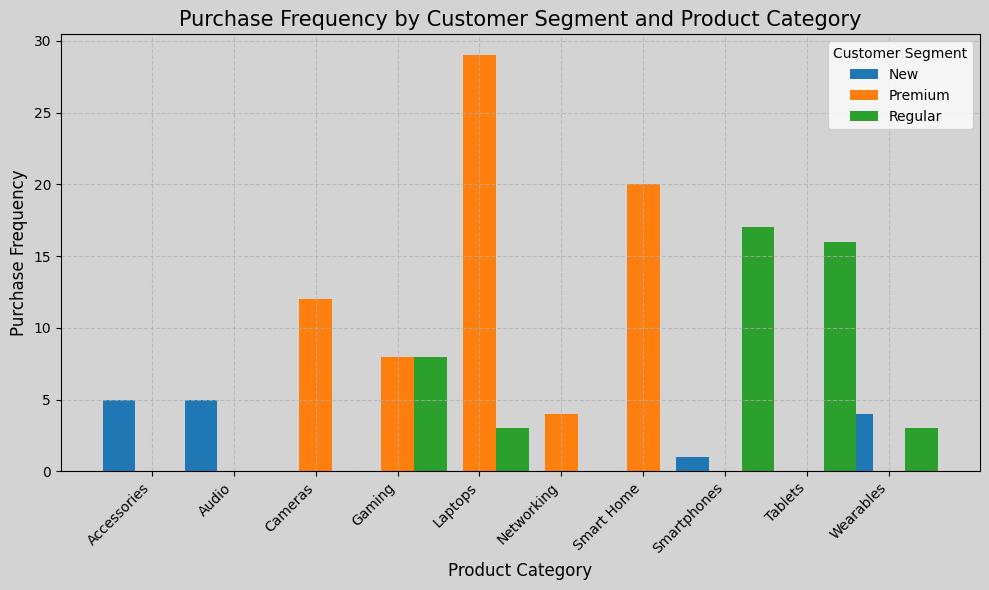

In [18]:
#group data for visualization
grouped_df = customer_df.groupby(['Product_Category', 'Segment'])['Purchase_Frequency'].sum().unstack()

#create categories and groups
categories = grouped_df.index  # Product Categories
group_names = grouped_df.columns  # Customer Segments

#set index and bar width
index = np.arange(len(categories))
bar_width = 0.4

#create the plot
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('lightgray')
ax.set_facecolor('lightgray')

#add bars
for i, segment in enumerate(group_names):
    ax.bar(index + i * bar_width, grouped_df[segment], bar_width, label=segment)

#format x-axis ticks
ax.set_xticks(index + (bar_width * (len(group_names) - 1)) / 2)  # Center the ticks
ax.set_xticklabels(categories, rotation=45, ha='right')  # Rotate for better readability

#add labels
ax.set_xlabel('Product Category', fontsize=12)  # X-axis label
ax.set_ylabel('Purchase Frequency', fontsize=12)  # Y-axis label

#add title
ax.set_title('Purchase Frequency by Customer Segment and Product Category', fontsize=15)

#add legends
ax.legend(title='Customer Segment')  # Adds a legend with a title

ax.grid(True, linestyle='--', alpha=0.7)  # Adds dashed gridlines for better readability

plt.tight_layout()
plt.show()

##Task 4: Market Position Dashboard

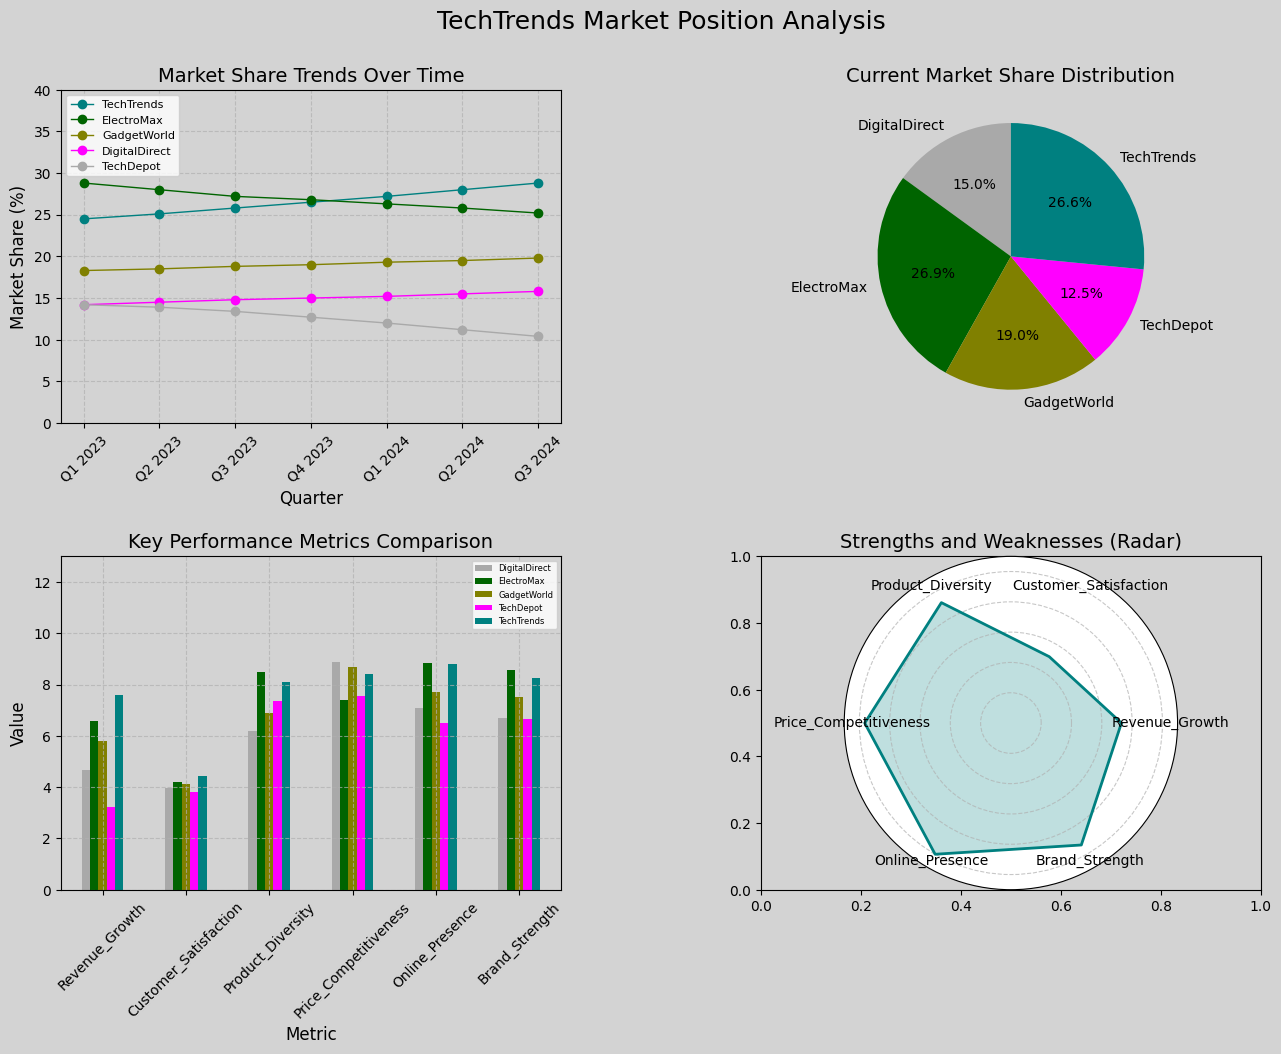

In [22]:
# Create a figure with a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))


# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Set the main title for the figure
fig.suptitle('TechTrends Market Position Analysis', fontsize=18)
fig.set_facecolor('lightgray')
axs[0, 0].set_facecolor('lightgray')
axs[0, 1].set_facecolor('lightgray')
axs[1, 0].set_facecolor('lightgray')
axs[1, 1].set_facecolor('lightgray')

# Define the colors for the companies
colors = ['teal', 'darkgreen', 'olive', 'magenta', 'darkgrey']

# Plot 1: Line chart - Market share trends over time
for i, company in enumerate(comp_analysis_df['Company'].unique()):
    company_data = comp_analysis_df[comp_analysis_df['Company'] == company]
    axs[0, 0].plot(company_data['Quarter'], company_data['Market_Share'],
                   label=company, color=colors[i], linewidth=1, marker='o')

#adding y-axis limit to accomodate legend
axs[0, 0].set_ylim(0, 40)
# Adding titles and labels
axs[0, 0].set_title('Market Share Trends Over Time', fontsize=14)
axs[0, 0].set_xlabel('Quarter', fontsize=12)
axs[0, 0].set_ylabel('Market Share (%)', fontsize=12)

# Style the grid and ticks
axs[0, 0].grid(True, linestyle='--', alpha=0.7)
axs[0, 0].tick_params(axis='x', rotation=45)

#adding legend
axs[0,0].legend(fontsize = 8, loc='upper left')


# Plot 2: Pie chart - Market share distribution
market_share_values = comp_analysis_df.groupby('Company')['Market_Share'].sum()  # Aggregate market share per company
labels = market_share_values.index

axs[0, 1].pie(market_share_values, labels=labels, autopct='%1.1f%%', colors=['darkgrey', 'darkgreen', 'olive', 'magenta', 'teal'], startangle=90)

# Adding title
axs[0, 1].set_title('Current Market Share Distribution', fontsize=14)


# Plot 3: Bar chart - Key performance metrics comparison
metrics = ['Revenue_Growth', 'Customer_Satisfaction', 'Product_Diversity', 'Price_Competitiveness', 'Online_Presence', 'Brand_Strength']
competitors = comp_analysis_df['Company'].unique()

# Create an array of values for each metric by company
values = comp_analysis_df.groupby(['Company'])[metrics].mean()

# Create bar chart
values.T.plot(kind='bar', ax=axs[1, 0], color=['darkgrey', 'darkgreen', 'olive', 'magenta', 'teal'])

# Set title and labels
axs[1, 0].set_title('Key Performance Metrics Comparison', fontsize=14)
axs[1, 0].set_xlabel('Metric', fontsize=12)
axs[1, 0].set_ylabel('Value', fontsize=12)
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].set_ylim(0, 13)
#adding grid
axs[1, 0].grid(True, linestyle='--', alpha=0.7)

#adding legend
axs[1, 0].legend(fontsize=6)

#Plot 4: Radar Chart
# Prepare data for radar chart
categories = metrics  # Metrics as radar chart categories

# Manually normalize TechTrends values (0 to 1 range)
techtrends_values = comp_analysis_df[comp_analysis_df['Company'] == 'TechTrends'][metrics].values[0]
techtrends_values_normalized = techtrends_values / techtrends_values.max()

# Create angles for the radar chart
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()

# Make the plot circular by adding the first value to the end
techtrends_values_normalized = np.concatenate((techtrends_values_normalized, techtrends_values_normalized[:1]))
angles += angles[:1]

# Create radar chart
axs[1, 1] = plt.subplot(2, 2, 4, polar=True)
axs[1, 1].plot(angles, techtrends_values_normalized, linewidth=2, linestyle='solid', label='TechTrends', color='teal')
axs[1, 1].fill(angles, techtrends_values_normalized, color='teal', alpha=0.25)


# Add labels for categories without rotating them
for i, angle in enumerate(angles[:-1]):
    # Adjusting the position of labels along the radius
    axs[1, 1].text(angle, 1.05, categories[i], horizontalalignment='center', verticalalignment='center', fontsize=10)

# Add a title to the radar chart
axs[1, 1].set_title('Strengths and Weaknesses (Radar)', fontsize=14)

# Adjust the radius of the chart to ensure labels stay inside the chart area
axs[1, 1].set_ylim(0, 1.1)
axs[1, 1].set_xticks([])
axs[1, 1].set_yticklabels([])

# Hide radial gridlines or adjust them as needed
axs[1, 1].grid(True, linestyle='--', alpha=0.7)

# Adjust padding around the radar chart by modifying subplot settings
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)